In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def findOutlier(data):
    # boxplot IQR 
    Q1 = data_comb.quantile(0.25)
    Q3 = data_comb.quantile(0.75)
    IQR = Q3-Q1
    #df = ((data < Q1 - 3*IQR) | (data > Q3+3*IQR))
    df = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

    # Iterate through dataframe and find aqua or freesurfer outlier
    for idx in df:
        aq_count = 0
        fs_count = 0
        print('-------------------------------')
        print(idx)
        #print(df[idx])
        count = 0
        #print('%s = \n' %(idx), df[idx])
        for i,c in df[idx].items(): 
            if(c == True):
                count+=1
                if(i[0].isdigit()):
                    aq_count += 1
                if(i[0].isalpha()):
                    fs_count += 1

                #print("%d = %s" %(count, i))
        print("aq_count = ", aq_count)
        print("fs_count = ", fs_count)




# import freesurfer and aqua and match index and combine
data_aq = pd.read_csv('aqua_volume_1yr(26).csv')
data_aq = data_aq.set_index('ID')
data_aq.index.name = 'Filename'

data_fs = pd.read_csv('freesurfer_volume_1yr(26).csv')
data_fs = data_fs.set_index('Filename')

# match data metric of aqua to freesurfer
data_aq = data_aq * 1000
data_comb = data_aq.append(data_fs)

findOutlier(data_comb)

-------------------------------
left_cerebral_white_matter
aq_count =  2
fs_count =  43
-------------------------------
left_lateral_ventricle
aq_count =  90
fs_count =  86
-------------------------------
left_cerebellum_white_matter
aq_count =  4
fs_count =  56
-------------------------------
left_cerebellum_cortex
aq_count =  10
fs_count =  11
-------------------------------
left_thalamus_proper
aq_count =  29
fs_count =  14
-------------------------------
left_caudate
aq_count =  17
fs_count =  138
-------------------------------
left_putamen
aq_count =  46
fs_count =  54
-------------------------------
left_pallidum
aq_count =  4
fs_count =  50
-------------------------------
3rd_ventricle
aq_count =  34
fs_count =  27
-------------------------------
4th_ventricle
aq_count =  19
fs_count =  79
-------------------------------
left_hippocampus
aq_count =  11
fs_count =  5
-------------------------------
left_amygdala
aq_count =  0
fs_count =  3
-------------------------------
left_ac

In [3]:
def findDiffOutlier(data):
    data = data.set_index('Filename')
    for i in data:
        outlier = []
        #print(data[i])
        #print(i)
        
        data[i] = abs(data[i])
    
        data_std = np.std(data[i])
        data_mean = np.mean(data[i])
        
        cut_off = data_std * 3
        
        lower_limit = data_mean - cut_off
        upper_limit = data_mean + cut_off
        
        print(i)
        print(lower_limit)
        
        count = 0
        for val in data[i]:
            if val > upper_limit or val < lower_limit:
                count += 1
                outlier.append(val)
        
        print("count = %d   outlier = " %(count), outlier)
        
    
diff = pd.read_csv('difference.csv')
findDiffOutlier(diff)    

left_cerebral_white_matter
-17142.825968999714
count = 39   outlier =  [59797.71646, 50836.53945, 51016.86226, 60915.239129999994, 51865.6676, 55004.89159, 56451.449029999996, 63296.96906, 89987.09025, 61413.339960000005, 53977.8718, 57785.82961, 62644.81165, 52388.98513, 55714.47165, 55088.617739999994, 63504.25045, 68187.74733, 81349.9004, 76362.08774, 64854.383120000006, 51354.19582, 51361.0408, 57767.32115, 56359.3495, 53232.72168, 61438.097870000005, 85457.09867, 68571.77582000001, 62351.45511, 51346.77597, 74801.12513, 52566.326989999994, 94823.39618, 87002.39822, 59705.8294, 60699.04584, 62143.49691, 59787.1569]
left_lateral_ventricle
-1001.1190749592005
count = 25   outlier =  [3304.7723100000003, 3317.8894010000004, 3021.4524469999997, 3092.908375, 3272.433122, 3007.8092269999997, 4624.102564, 4457.249283, 4377.915378, 4487.288601, 3180.2033739999997, 2934.109921, 3104.331245, 2743.58237, 3026.691304, 2984.6856399999997, 3044.353595, 2878.424746, 2812.660708, 3025.096267000000

In [12]:
def findOutlier(data1, data2, label):
        
    val_list = []
    aq_list = []
    fs_list = []
    

    Q1 = data1[label].quantile(0.25)
    Q3 = data1[label].quantile(0.75)
    IQR = Q3-Q1
    
    count = 0
    for val1 in data1[label]:
        #print(val)
        if((val1 < (Q1 - 1.5 * IQR)) | (val1 > (Q3 + 1.5 * IQR))):
            val_list.append(count)
            aq_list.append(count)
        count += 1
        
    Q1_2 = data2[label].quantile(0.25)
    Q3_2 = data2[label].quantile(0.75)
    IQR_2 = Q3_2-Q1_2
    
        
    count = 0
    for val2 in data2[label]:
        #print(val)
        if((val2 < (Q1_2 - 1.5 * IQR_2)) | (val2 > (Q3_2 + 1.5 * IQR_2)) and (count not in val_list)):
            val_list.append(count)
            fs_list.append(count)
        count += 1   
    
    print("%s : %d = %s" %(label, len(val_list), val_list))
    print("-------------------------------------")
    print("aq = ", aq_list)
    print("-------------------------------------")
    print("fs = ", fs_list)
    
    
    return val_list
        
    
def printBoxPlot(data_aq, data_fs):

    for idx in data_aq:
        #print(idx)
        if(idx == 'Filename'):
            continue

        data = [data_aq[idx], data_fs[idx]]
        labels = ['AQUA','FREESURFER']
        outlier = dict(markerfacecolor='r', marker='o', c='r')


        plt.figure(figsize=(10,5))
        
        idx_list = findOutlier(data_aq, data_fs, idx)
        
        for pt in idx_list:
            x1 = data_aq[idx].iloc[pt]
            y1 = data_fs[idx].iloc[pt]
            plt.plot([1,2],[x1,y1], marker='o', c='b')

        plt.boxplot(data,vert=True,labels=labels, flierprops=outlier)
        plt.title("%s boxplot" %(idx))
        plt.xlabel('Software')
        plt.ylabel('Average Volume Difference (cm^3)')
        plt.show()

left_cerebral_white_matter : 31 = [1270, 1271, 1272, 1273, 1274, 1275, 1365, 1366, 1367, 1368, 1369, 1547, 1548, 1550, 2098, 2099, 2100, 2101, 2102, 2103, 789, 790, 1042, 1200, 1551, 1761, 1763, 1764, 1893, 1895, 2105]
-------------------------------------
aq =  [1270, 1271, 1272, 1273, 1274, 1275, 1365, 1366, 1367, 1368, 1369, 1547, 1548, 1550, 2098, 2099, 2100, 2101, 2102, 2103]
-------------------------------------
fs =  [789, 790, 1042, 1200, 1551, 1761, 1763, 1764, 1893, 1895, 2105]


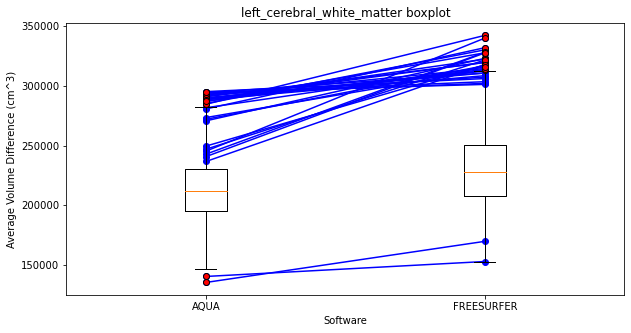

left_lateral_ventricle : 93 = [9, 10, 11, 12, 220, 243, 433, 434, 435, 436, 437, 438, 558, 559, 560, 690, 691, 692, 693, 719, 720, 721, 722, 723, 789, 790, 791, 798, 799, 800, 816, 818, 822, 823, 824, 840, 841, 842, 889, 891, 963, 964, 965, 966, 971, 972, 973, 974, 1035, 1036, 1037, 1221, 1222, 1223, 1224, 1225, 1226, 1330, 1331, 1332, 1606, 1607, 1608, 1615, 1616, 1617, 1799, 1800, 1801, 1802, 1803, 1804, 1842, 1843, 1844, 1887, 1888, 1889, 2089, 2102, 2103, 2104, 2105, 2159, 2160, 2161, 2166, 2167, 2181, 2182, 2246, 2086, 2088]
-------------------------------------
aq =  [9, 10, 11, 12, 220, 243, 433, 434, 435, 436, 437, 438, 558, 559, 560, 690, 691, 692, 693, 719, 720, 721, 722, 723, 789, 790, 791, 798, 799, 800, 816, 818, 822, 823, 824, 840, 841, 842, 889, 891, 963, 964, 965, 966, 971, 972, 973, 974, 1035, 1036, 1037, 1221, 1222, 1223, 1224, 1225, 1226, 1330, 1331, 1332, 1606, 1607, 1608, 1615, 1616, 1617, 1799, 1800, 1801, 1802, 1803, 1804, 1842, 1843, 1844, 1887, 1888, 1889, 2089

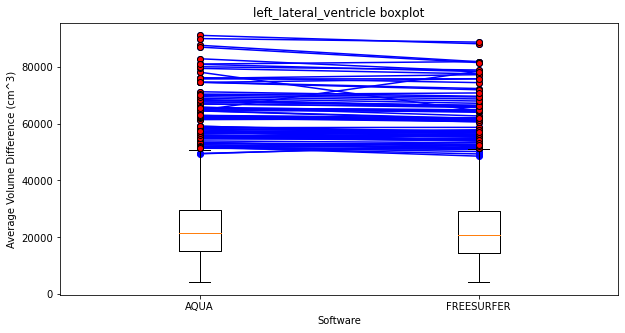

left_cerebellum_white_matter : 38 = [417, 418, 419, 679, 680, 681, 741, 967, 968, 969, 970, 1003, 1004, 1570, 1571, 1572, 49, 308, 314, 591, 592, 593, 720, 1069, 1088, 1249, 1365, 1367, 1369, 1641, 1853, 1885, 1926, 1927, 1928, 2043, 2046, 2214]
-------------------------------------
aq =  [417, 418, 419, 679, 680, 681, 741, 967, 968, 969, 970, 1003, 1004, 1570, 1571, 1572]
-------------------------------------
fs =  [49, 308, 314, 591, 592, 593, 720, 1069, 1088, 1249, 1365, 1367, 1369, 1641, 1853, 1885, 1926, 1927, 1928, 2043, 2046, 2214]


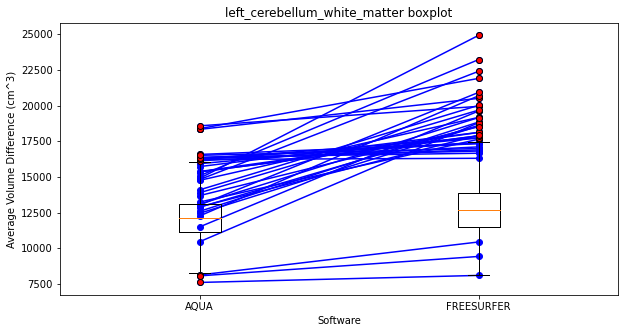

left_cerebellum_cortex : 16 = [876, 877, 878, 991, 992, 993, 994, 1395, 1396, 1570, 1571, 1572, 721, 722, 723, 2098]
-------------------------------------
aq =  [876, 877, 878, 991, 992, 993, 994, 1395, 1396, 1570, 1571, 1572]
-------------------------------------
fs =  [721, 722, 723, 2098]


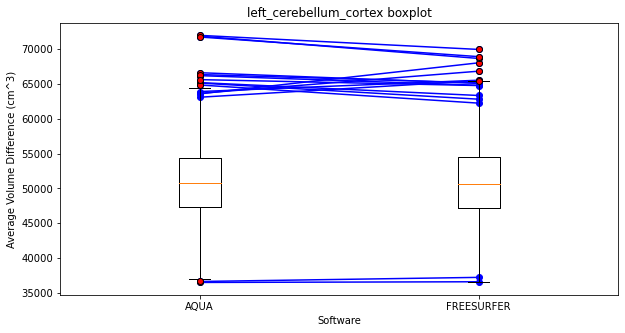

left_thalamus_proper : 38 = [184, 185, 186, 841, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1547, 1548, 1549, 1570, 1571, 1572, 1738, 1843, 40, 437, 540, 842, 957, 1762, 1763, 1765, 1808, 1842, 1893, 2101, 2104, 2167]
-------------------------------------
aq =  [184, 185, 186, 841, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1547, 1548, 1549, 1570, 1571, 1572, 1738, 1843]
-------------------------------------
fs =  [40, 437, 540, 842, 957, 1762, 1763, 1765, 1808, 1842, 1893, 2101, 2104, 2167]


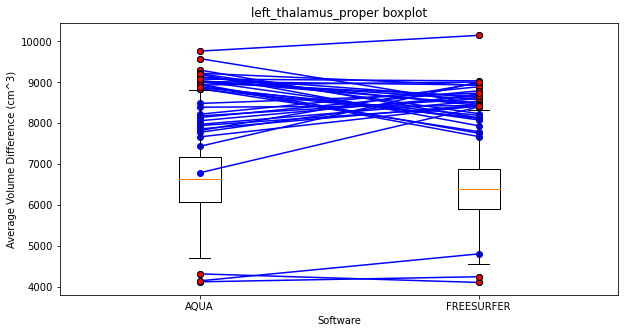

left_caudate : 99 = [221, 582, 583, 584, 798, 854, 895, 896, 897, 963, 964, 965, 966, 967, 968, 969, 970, 1041, 1042, 1110, 1547, 1548, 1549, 1744, 1745, 1956, 1957, 1958, 2104, 2106, 2107, 2108, 2109, 2156, 2157, 2158, 12, 51, 83, 95, 104, 174, 219, 220, 435, 436, 446, 447, 450, 679, 680, 682, 683, 687, 690, 691, 692, 693, 721, 753, 799, 800, 822, 823, 824, 851, 861, 862, 863, 979, 980, 981, 982, 1001, 1038, 1252, 1253, 1618, 1619, 1620, 1787, 1814, 1816, 1926, 1927, 1928, 2085, 2086, 2087, 2102, 2103, 2105, 2171, 2172, 2181, 2182, 2221, 2222, 2223]
-------------------------------------
aq =  [221, 582, 583, 584, 798, 854, 895, 896, 897, 963, 964, 965, 966, 967, 968, 969, 970, 1041, 1042, 1110, 1547, 1548, 1549, 1744, 1745, 1956, 1957, 1958, 2104, 2106, 2107, 2108, 2109, 2156, 2157, 2158]
-------------------------------------
fs =  [12, 51, 83, 95, 104, 174, 219, 220, 435, 436, 446, 447, 450, 679, 680, 682, 683, 687, 690, 691, 692, 693, 721, 753, 799, 800, 822, 823, 824, 851, 861, 862

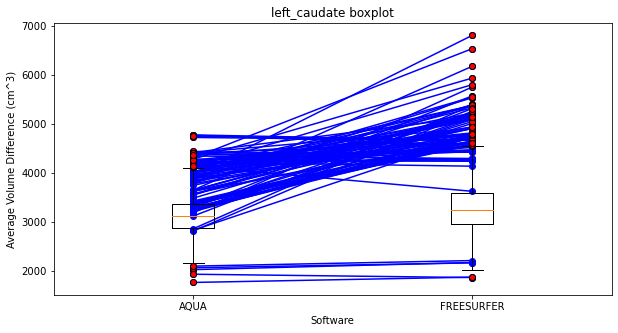

left_putamen : 85 = [243, 244, 684, 685, 686, 687, 799, 850, 851, 864, 866, 895, 896, 897, 914, 916, 919, 963, 964, 965, 966, 967, 968, 969, 970, 1547, 1548, 1549, 1726, 1727, 1728, 1926, 1927, 1928, 2102, 2104, 2106, 2107, 2108, 2109, 2221, 2222, 2223, 29, 30, 32, 102, 103, 104, 109, 260, 262, 521, 679, 680, 681, 682, 683, 688, 689, 783, 784, 785, 788, 792, 852, 853, 854, 861, 862, 865, 918, 955, 956, 1197, 1198, 1199, 1277, 1556, 1557, 1707, 1938, 1939, 1983, 2105]
-------------------------------------
aq =  [243, 244, 684, 685, 686, 687, 799, 850, 851, 864, 866, 895, 896, 897, 914, 916, 919, 963, 964, 965, 966, 967, 968, 969, 970, 1547, 1548, 1549, 1726, 1727, 1728, 1926, 1927, 1928, 2102, 2104, 2106, 2107, 2108, 2109, 2221, 2222, 2223]
-------------------------------------
fs =  [29, 30, 32, 102, 103, 104, 109, 260, 262, 521, 679, 680, 681, 682, 683, 688, 689, 783, 784, 785, 788, 792, 852, 853, 854, 861, 862, 865, 918, 955, 956, 1197, 1198, 1199, 1277, 1556, 1557, 1707, 1938, 1939,

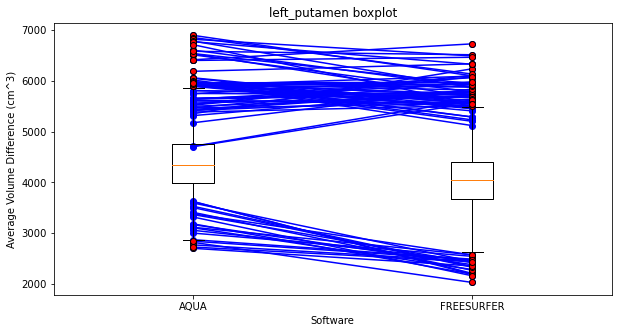

left_pallidum : 41 = [110, 487, 488, 490, 491, 783, 785, 788, 798, 852, 854, 919, 946, 947, 967, 968, 969, 970, 1071, 1270, 1272, 1548, 1549, 1617, 1854, 1856, 1881, 1882, 2069, 2155, 109, 220, 244, 486, 489, 840, 955, 956, 964, 1844, 1866]
-------------------------------------
aq =  [110, 487, 488, 490, 491, 783, 785, 788, 798, 852, 854, 919, 946, 947, 967, 968, 969, 970, 1071, 1270, 1272, 1548, 1549, 1617, 1854, 1856, 1881, 1882, 2069, 2155]
-------------------------------------
fs =  [109, 220, 244, 486, 489, 840, 955, 956, 964, 1844, 1866]


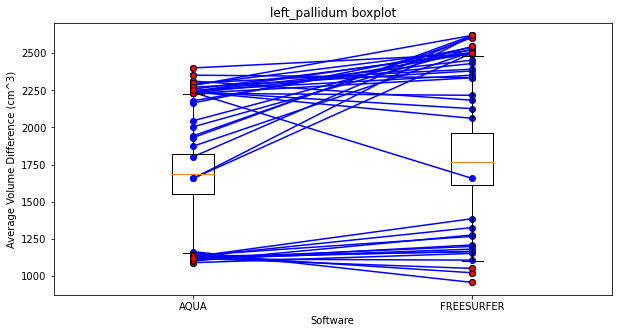

3rd_ventricle : 46 = [9, 10, 11, 12, 692, 840, 842, 1088, 1089, 1090, 1760, 1763, 2086, 2089, 150, 151, 152, 153, 436, 438, 561, 562, 563, 841, 861, 862, 863, 963, 964, 966, 1037, 1851, 1852, 1853, 1983, 1984, 1985, 2087, 2088, 2102, 2103, 2104, 2105, 2114, 2115, 2214]
-------------------------------------
aq =  [9, 10, 11, 12, 692, 840, 842, 1088, 1089, 1090, 1760, 1763, 2086, 2089]
-------------------------------------
fs =  [150, 151, 152, 153, 436, 438, 561, 562, 563, 841, 861, 862, 863, 963, 964, 966, 1037, 1851, 1852, 1853, 1983, 1984, 1985, 2087, 2088, 2102, 2103, 2104, 2105, 2114, 2115, 2214]


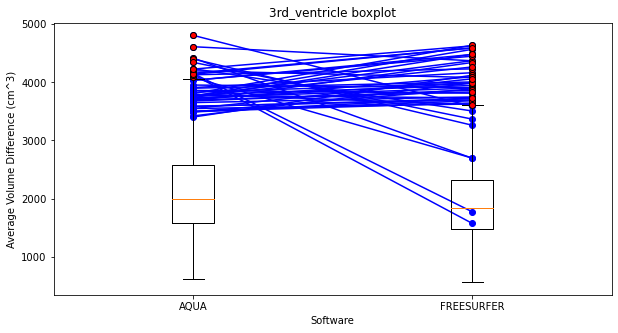

4th_ventricle : 59 = [340, 552, 553, 554, 792, 793, 794, 840, 842, 926, 927, 928, 929, 948, 1062, 1063, 1064, 1235, 1237, 1484, 1485, 1556, 1557, 1558, 1559, 1561, 1562, 1563, 1750, 1751, 1752, 1787, 1788, 1789, 1790, 1791, 1792, 1799, 2102, 2103, 2104, 2105, 2143, 2144, 2145, 2171, 2172, 176, 177, 720, 841, 992, 993, 1234, 1236, 1482, 1483, 1560, 1634]
-------------------------------------
aq =  [340, 552, 553, 554, 792, 793, 794, 840, 842, 926, 927, 928, 929, 948, 1062, 1063, 1064, 1235, 1237, 1484, 1485, 1556, 1557, 1558, 1559, 1561, 1562, 1563, 1750, 1751, 1752, 1787, 1788, 1789, 1790, 1791, 1792, 1799, 2102, 2103, 2104, 2105, 2143, 2144, 2145, 2171, 2172]
-------------------------------------
fs =  [176, 177, 720, 841, 992, 993, 1234, 1236, 1482, 1483, 1560, 1634]


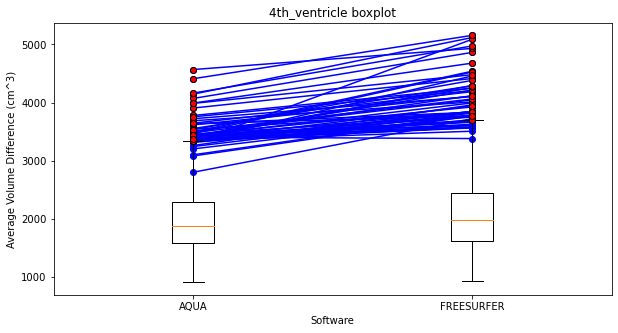

left_hippocampus : 8 = [193, 194, 195, 196, 197, 1330, 1331, 1332]
-------------------------------------
aq =  [193, 194, 195, 196, 197, 1330, 1331, 1332]
-------------------------------------
fs =  []


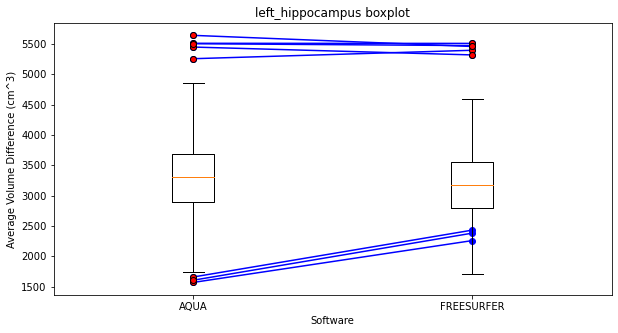

left_amygdala : 3 = [852, 853, 1716]
-------------------------------------
aq =  [852, 853, 1716]
-------------------------------------
fs =  []


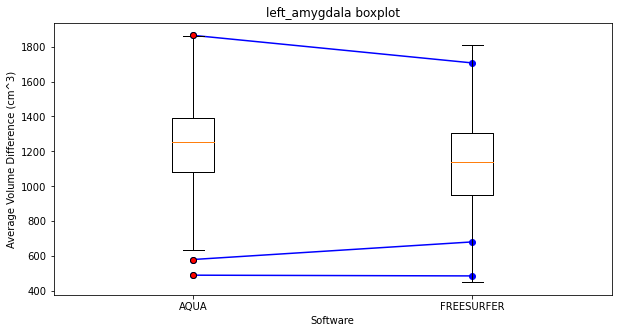

left_accumbens_area : 65 = [219, 220, 221, 260, 262, 281, 282, 283, 284, 285, 286, 309, 310, 311, 356, 357, 358, 762, 763, 765, 850, 851, 852, 853, 980, 1038, 1071, 1072, 1093, 1124, 1126, 1225, 1226, 1329, 1937, 2102, 2104, 2107, 2109, 2178, 31, 32, 43, 44, 45, 520, 521, 522, 535, 854, 862, 863, 963, 964, 1017, 1151, 1548, 1549, 1688, 1726, 1727, 2028, 2098, 2106, 2108]
-------------------------------------
aq =  [219, 220, 221, 260, 262, 281, 282, 283, 284, 285, 286, 309, 310, 311, 356, 357, 358, 762, 763, 765, 850, 851, 852, 853, 980, 1038, 1071, 1072, 1093, 1124, 1126, 1225, 1226, 1329, 1937, 2102, 2104, 2107, 2109, 2178]
-------------------------------------
fs =  [31, 32, 43, 44, 45, 520, 521, 522, 535, 854, 862, 863, 963, 964, 1017, 1151, 1548, 1549, 1688, 1726, 1727, 2028, 2098, 2106, 2108]


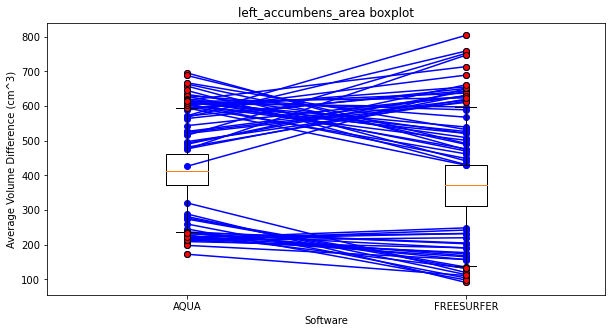

left_ventraldc : 30 = [842, 1071, 1274, 1276, 1277, 1278, 1279, 1280, 1281, 1357, 1358, 1365, 1366, 1367, 1368, 1369, 1548, 1551, 1570, 1571, 1572, 1738, 1739, 1740, 1839, 2155, 521, 1547, 1855, 1882]
-------------------------------------
aq =  [842, 1071, 1274, 1276, 1277, 1278, 1279, 1280, 1281, 1357, 1358, 1365, 1366, 1367, 1368, 1369, 1548, 1551, 1570, 1571, 1572, 1738, 1739, 1740, 1839, 2155]
-------------------------------------
fs =  [521, 1547, 1855, 1882]


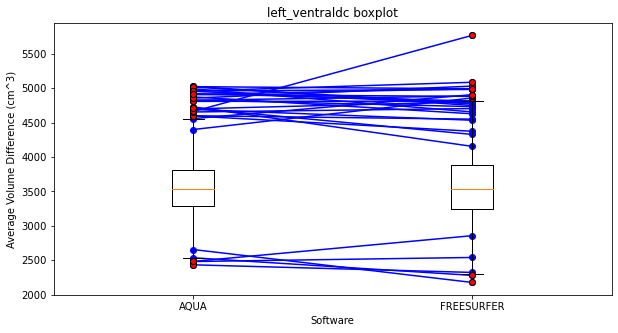

right_cerebral_white_matter : 33 = [1201, 1202, 1270, 1271, 1272, 1273, 1274, 1275, 1365, 1366, 1367, 1368, 1369, 1548, 2098, 2099, 2100, 2101, 243, 789, 790, 791, 1200, 1550, 1551, 1760, 1761, 1762, 1763, 1764, 1765, 2103, 2105]
-------------------------------------
aq =  [1201, 1202, 1270, 1271, 1272, 1273, 1274, 1275, 1365, 1366, 1367, 1368, 1369, 1548, 2098, 2099, 2100, 2101]
-------------------------------------
fs =  [243, 789, 790, 791, 1200, 1550, 1551, 1760, 1761, 1762, 1763, 1764, 1765, 2103, 2105]


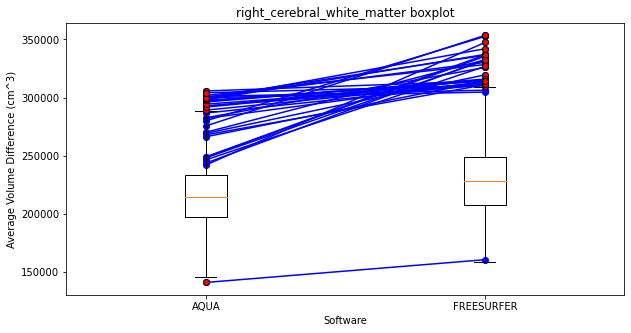

right_lateral_ventricle : 103 = [9, 10, 11, 12, 405, 406, 407, 433, 434, 435, 436, 437, 438, 540, 541, 542, 690, 691, 692, 693, 719, 720, 721, 722, 723, 789, 791, 798, 799, 800, 820, 830, 840, 841, 842, 861, 862, 863, 889, 890, 891, 965, 979, 980, 981, 982, 1035, 1036, 1037, 1253, 1330, 1331, 1332, 1504, 1606, 1607, 1608, 1649, 1760, 1761, 1762, 1763, 1764, 1765, 1887, 1888, 1889, 1983, 1984, 1985, 2086, 2088, 2089, 2102, 2103, 2104, 2105, 2114, 2115, 2159, 2160, 2161, 2165, 2166, 2167, 2181, 2182, 2223, 2245, 2246, 2247, 559, 822, 824, 828, 966, 1226, 1236, 1237, 1616, 1617, 2085, 2087]
-------------------------------------
aq =  [9, 10, 11, 12, 405, 406, 407, 433, 434, 435, 436, 437, 438, 540, 541, 542, 690, 691, 692, 693, 719, 720, 721, 722, 723, 789, 791, 798, 799, 800, 820, 830, 840, 841, 842, 861, 862, 863, 889, 890, 891, 965, 979, 980, 981, 982, 1035, 1036, 1037, 1253, 1330, 1331, 1332, 1504, 1606, 1607, 1608, 1649, 1760, 1761, 1762, 1763, 1764, 1765, 1887, 1888, 1889, 1983, 198

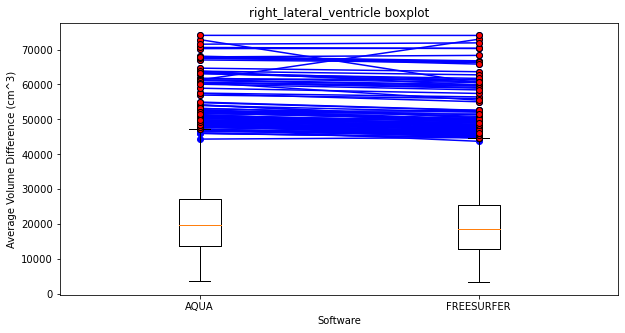

right_cerebellum_white_matter : 66 = [184, 185, 417, 418, 419, 534, 536, 679, 680, 681, 682, 683, 967, 968, 969, 970, 1003, 1004, 1365, 1366, 1367, 1368, 1369, 1460, 1570, 1571, 1572, 1618, 1619, 1620, 1898, 2195, 21, 34, 137, 139, 314, 334, 335, 337, 371, 380, 592, 720, 958, 1069, 1138, 1165, 1223, 1243, 1389, 1456, 1458, 1627, 1664, 1665, 1809, 1853, 1885, 1924, 1928, 2045, 2046, 2214, 2222, 2223]
-------------------------------------
aq =  [184, 185, 417, 418, 419, 534, 536, 679, 680, 681, 682, 683, 967, 968, 969, 970, 1003, 1004, 1365, 1366, 1367, 1368, 1369, 1460, 1570, 1571, 1572, 1618, 1619, 1620, 1898, 2195]
-------------------------------------
fs =  [21, 34, 137, 139, 314, 334, 335, 337, 371, 380, 592, 720, 958, 1069, 1138, 1165, 1223, 1243, 1389, 1456, 1458, 1627, 1664, 1665, 1809, 1853, 1885, 1924, 1928, 2045, 2046, 2214, 2222, 2223]


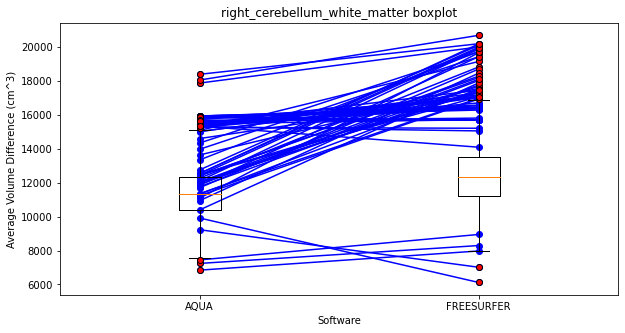

right_cerebellum_cortex : 36 = [570, 571, 572, 876, 877, 878, 895, 896, 897, 1003, 1005, 1136, 1137, 1138, 1200, 1202, 1276, 1277, 1278, 1279, 1280, 1395, 1396, 1397, 1570, 1571, 1572, 2100, 2101, 722, 723, 1068, 1070, 1201, 2098, 2099]
-------------------------------------
aq =  [570, 571, 572, 876, 877, 878, 895, 896, 897, 1003, 1005, 1136, 1137, 1138, 1200, 1202, 1276, 1277, 1278, 1279, 1280, 1395, 1396, 1397, 1570, 1571, 1572, 2100, 2101]
-------------------------------------
fs =  [722, 723, 1068, 1070, 1201, 2098, 2099]


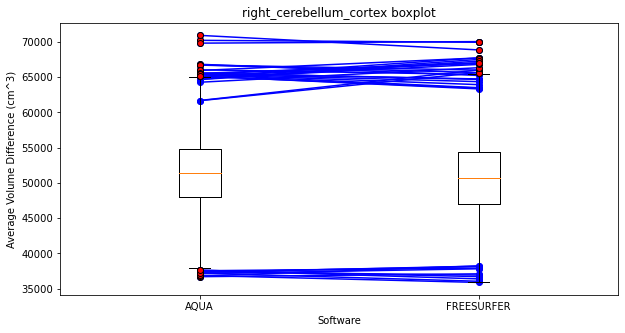

right_thalamus_proper : 15 = [1271, 1272, 1273, 1548, 1549, 1570, 1571, 1572, 786, 1547, 1760, 1762, 1842, 1843, 2167]
-------------------------------------
aq =  [1271, 1272, 1273, 1548, 1549, 1570, 1571, 1572]
-------------------------------------
fs =  [786, 1547, 1760, 1762, 1842, 1843, 2167]


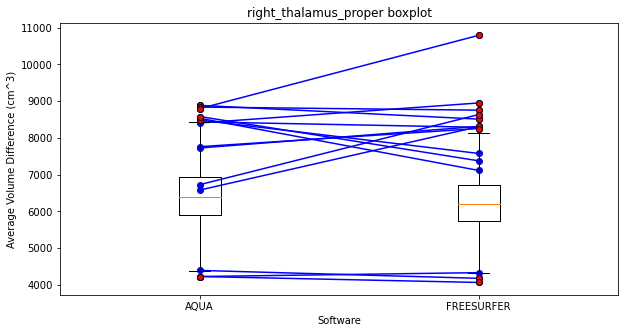

right_caudate : 88 = [219, 221, 295, 297, 499, 684, 686, 688, 689, 895, 1327, 1328, 1726, 1727, 1728, 2102, 2103, 2104, 2106, 2107, 2108, 2109, 2156, 2157, 2158, 2171, 2223, 49, 50, 51, 95, 104, 173, 174, 240, 241, 242, 243, 244, 420, 422, 445, 446, 447, 448, 449, 450, 685, 687, 692, 753, 786, 789, 790, 798, 799, 800, 822, 823, 824, 841, 861, 862, 863, 963, 964, 965, 966, 971, 979, 980, 981, 982, 1044, 1182, 1252, 1254, 1843, 1926, 1927, 1928, 1958, 1985, 2105, 2172, 2182, 2221, 2222]
-------------------------------------
aq =  [219, 221, 295, 297, 499, 684, 686, 688, 689, 895, 1327, 1328, 1726, 1727, 1728, 2102, 2103, 2104, 2106, 2107, 2108, 2109, 2156, 2157, 2158, 2171, 2223]
-------------------------------------
fs =  [49, 50, 51, 95, 104, 173, 174, 240, 241, 242, 243, 244, 420, 422, 445, 446, 447, 448, 449, 450, 685, 687, 692, 753, 786, 789, 790, 798, 799, 800, 822, 823, 824, 841, 861, 862, 863, 963, 964, 965, 966, 971, 979, 980, 981, 982, 1044, 1182, 1252, 1254, 1843, 1926, 1927, 

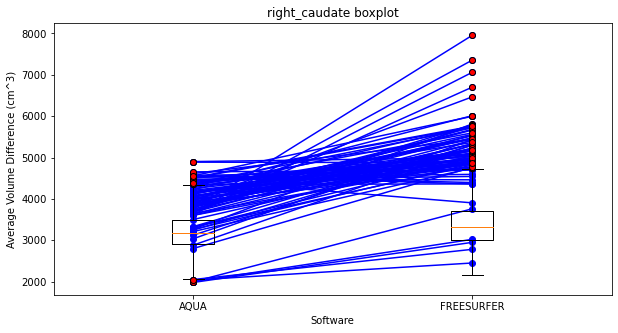

right_putamen : 64 = [243, 244, 684, 685, 686, 687, 688, 689, 798, 799, 861, 963, 964, 965, 966, 1275, 1726, 1727, 1728, 1926, 1927, 2102, 2103, 2104, 2221, 2222, 2223, 32, 102, 103, 104, 110, 260, 262, 421, 445, 446, 447, 448, 449, 450, 590, 788, 800, 967, 968, 969, 970, 1078, 1271, 1329, 1556, 1557, 1707, 1928, 1938, 1939, 1983, 1984, 1985, 2063, 2064, 2225, 2226]
-------------------------------------
aq =  [243, 244, 684, 685, 686, 687, 688, 689, 798, 799, 861, 963, 964, 965, 966, 1275, 1726, 1727, 1728, 1926, 1927, 2102, 2103, 2104, 2221, 2222, 2223]
-------------------------------------
fs =  [32, 102, 103, 104, 110, 260, 262, 421, 445, 446, 447, 448, 449, 450, 590, 788, 800, 967, 968, 969, 970, 1078, 1271, 1329, 1556, 1557, 1707, 1928, 1938, 1939, 1983, 1984, 1985, 2063, 2064, 2225, 2226]


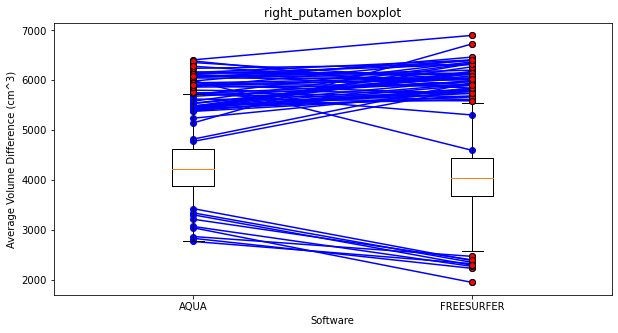

right_pallidum : 34 = [109, 281, 282, 283, 284, 286, 798, 799, 800, 918, 919, 1054, 1270, 1395, 1396, 1397, 1893, 2129, 2155, 2186, 2201, 2202, 2203, 2213, 2215, 101, 168, 285, 494, 708, 1271, 1272, 2102, 2103]
-------------------------------------
aq =  [109, 281, 282, 283, 284, 286, 798, 799, 800, 918, 919, 1054, 1270, 1395, 1396, 1397, 1893, 2129, 2155, 2186, 2201, 2202, 2203, 2213, 2215]
-------------------------------------
fs =  [101, 168, 285, 494, 708, 1271, 1272, 2102, 2103]


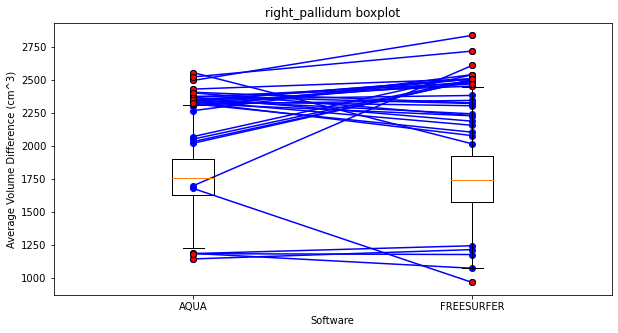

right_hippocampus : 13 = [195, 196, 408, 409, 410, 1981, 193, 194, 197, 421, 534, 535, 1980]
-------------------------------------
aq =  [195, 196, 408, 409, 410, 1981]
-------------------------------------
fs =  [193, 194, 197, 421, 534, 535, 1980]


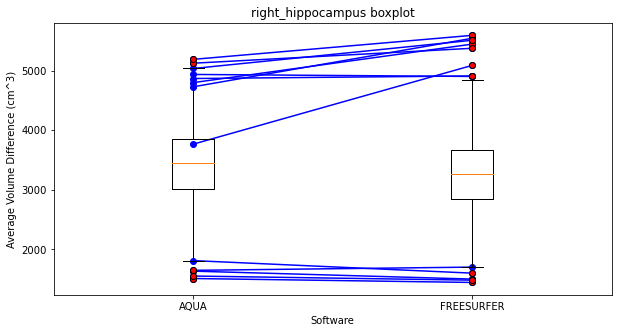

right_amygdala : 0 = []
-------------------------------------
aq =  []
-------------------------------------
fs =  []


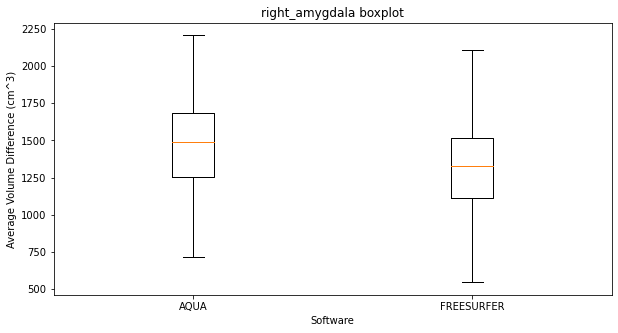

right_accumbens_area : 66 = [45, 220, 221, 261, 281, 283, 285, 286, 288, 309, 310, 312, 357, 358, 549, 719, 721, 785, 861, 1092, 1103, 1104, 1309, 1310, 1327, 1328, 1329, 1332, 1722, 1936, 1962, 2102, 2103, 2104, 2105, 2107, 2108, 2221, 2222, 29, 30, 31, 32, 44, 216, 217, 218, 260, 262, 293, 511, 512, 520, 521, 522, 535, 550, 1225, 1548, 1618, 1728, 1767, 1770, 1932, 1963, 2223]
-------------------------------------
aq =  [45, 220, 221, 261, 281, 283, 285, 286, 288, 309, 310, 312, 357, 358, 549, 719, 721, 785, 861, 1092, 1103, 1104, 1309, 1310, 1327, 1328, 1329, 1332, 1722, 1936, 1962, 2102, 2103, 2104, 2105, 2107, 2108, 2221, 2222]
-------------------------------------
fs =  [29, 30, 31, 32, 44, 216, 217, 218, 260, 262, 293, 511, 512, 520, 521, 522, 535, 550, 1225, 1548, 1618, 1728, 1767, 1770, 1932, 1963, 2223]


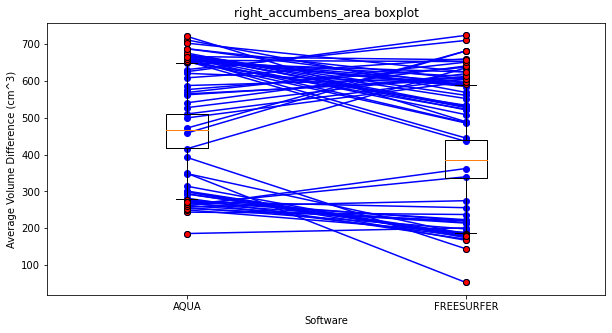

right_ventraldc : 37 = [40, 109, 591, 592, 593, 679, 680, 681, 842, 1274, 1276, 1277, 1278, 1279, 1357, 1365, 1366, 1367, 1368, 1369, 1570, 1571, 1572, 1619, 1738, 1739, 1740, 2104, 2105, 2114, 682, 683, 770, 820, 1281, 1882, 2187]
-------------------------------------
aq =  [40, 109, 591, 592, 593, 679, 680, 681, 842, 1274, 1276, 1277, 1278, 1279, 1357, 1365, 1366, 1367, 1368, 1369, 1570, 1571, 1572, 1619, 1738, 1739, 1740, 2104, 2105, 2114]
-------------------------------------
fs =  [682, 683, 770, 820, 1281, 1882, 2187]


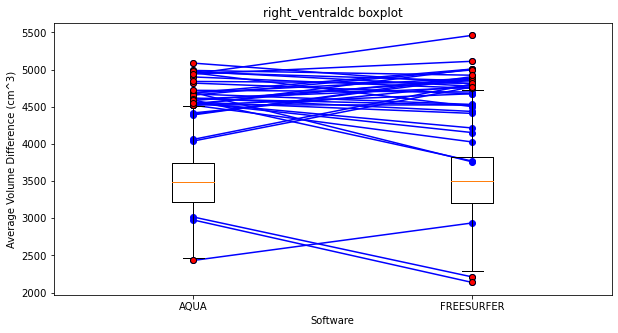

In [13]:
# import freesurfer and aqua and match index and combine
data_aq = pd.read_csv('aqua_volume_26_1yr.csv')
data_aq = data_aq.set_index('ID')
data_aq.index.name = 'Filename'

data_fs = pd.read_csv('freesurfer_volume_26_1yr.csv')
data_fs = data_fs.set_index('ID')
data_fs.index.name = 'Filename'

# match data metric of aqua to freesurfer
data_aq = data_aq * 1000

printBoxPlot(data_aq, data_fs)
    

#print(data_aq)
#print(data_fs)